# Practice 3

## 1.1 - Distances between objects

In [100]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1.3.1

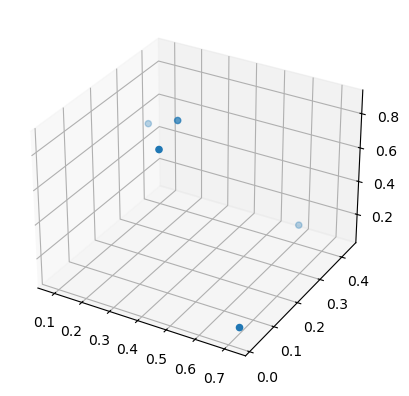

Distance between 0 - 1
Euclidean 0.8310381168702463
Euclidean squared 0.6906243516912451
Chebyshev 0.7583217335746385
Hemming 1.1593950470814582

Distance between 0 - 2
Euclidean 0.8488607184418485
Euclidean squared 0.7205645193136112
Chebyshev 0.6391687417785068
Hemming 1.425803868554719

Distance between 0 - 3
Euclidean 0.44447176939231114
Euclidean squared 0.19755515378673183
Chebyshev 0.42155775148951635
Hemming 0.5939445488803434

Distance between 0 - 4
Euclidean 0.853111782024128
Euclidean squared 0.7277997126283833
Chebyshev 0.7250321416296249
Hemming 1.3328809236041557

Distance between 1 - 2
Euclidean 0.5341474237779764
Euclidean squared 0.2853134703286491
Chebyshev 0.3287382942990117
Hemming 0.9238854100712841

Distance between 1 - 3
Euclidean 0.8917308952388643
Euclidean squared 0.7951839895235063
Chebyshev 0.7945871241558585
Hemming 1.345137024414996

Distance between 1 - 4
Euclidean 0.15992996034002038
Euclidean squared 0.02557759221436049
Chebyshev 0.1427027956128888
Hemm

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 5

x = np.random.random((n, 1))
y = np.random.random((n, 1))
z = np.random.random((n, 1))

ax.scatter(x, y, z)

plt.show()

adj = [[] for j in range(n)]

for i in range(n):
    for j in range(n):
        if i != j and j not in adj[i]:
            adj[i].append(j)
            adj[j].append(i)

            print(f'Distance between {i} - {j}')
            print(f'Euclidean {np.linalg.norm((x[i] - x[j], y[i] - y[j], z[i] - z[j]))}')
            print(f'Euclidean squared {np.linalg.norm((x[i] - x[j], y[i] - y[j], z[i] - z[j]))**2}')
            print(f'Chebyshev {np.linalg.norm((x[i] - x[j], y[i] - y[j], z[i] - z[j]), ord=np.inf)}')
            print(f'Hemming {np.linalg.norm((x[i] - x[j], y[i] - y[j], z[i] - z[j]), ord=1)}')
            print()


### Task 1.3.2

In [102]:
Z = np.zeros((5, 5))
Z += np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


## 2.1 - K-nearest neighbors

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [104]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


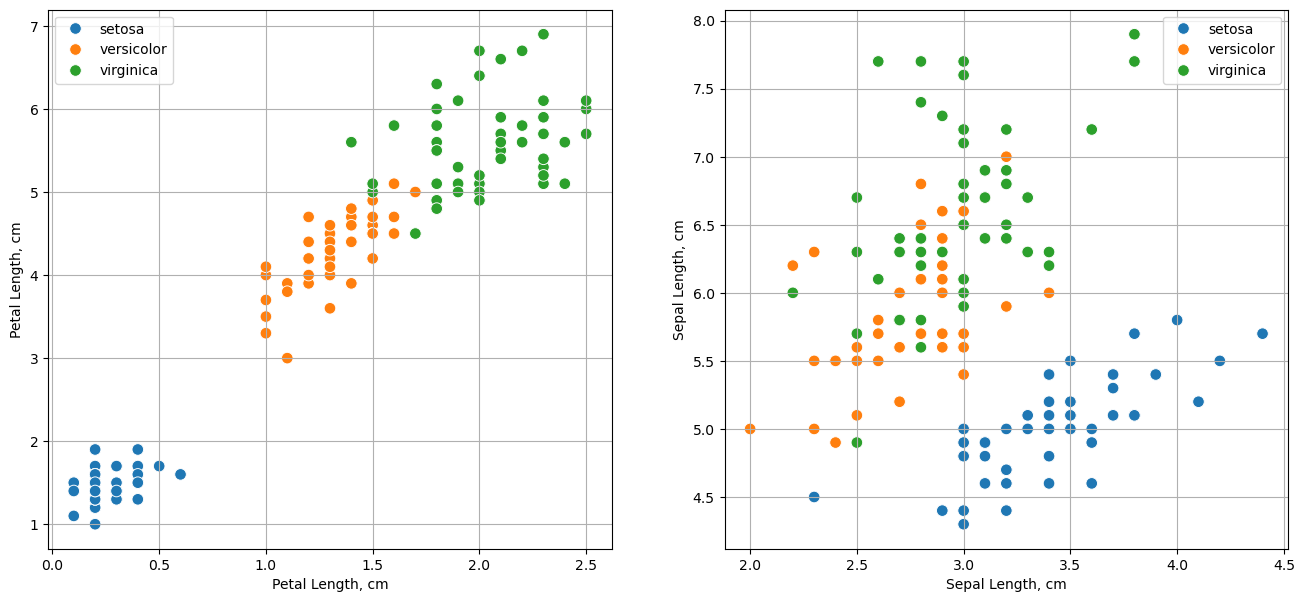

In [105]:
plt.figure(figsize=(16, 7))

plt.subplot(121)
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.xlabel('Petal Length, cm')
plt.ylabel('Petal Length, cm')
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(
    data=iris,
    x='sepal_width', y='sepal_length',
    hue='species',
    s=70
)
plt.xlabel('Sepal Length, cm')
plt.ylabel('Sepal Length, cm')
plt.legend()
plt.grid()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size=0.2
)

In [107]:
print(f'Train size {X_train.size}, Test size {X_test.size}')

Train size 480, Test size 120


In [108]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

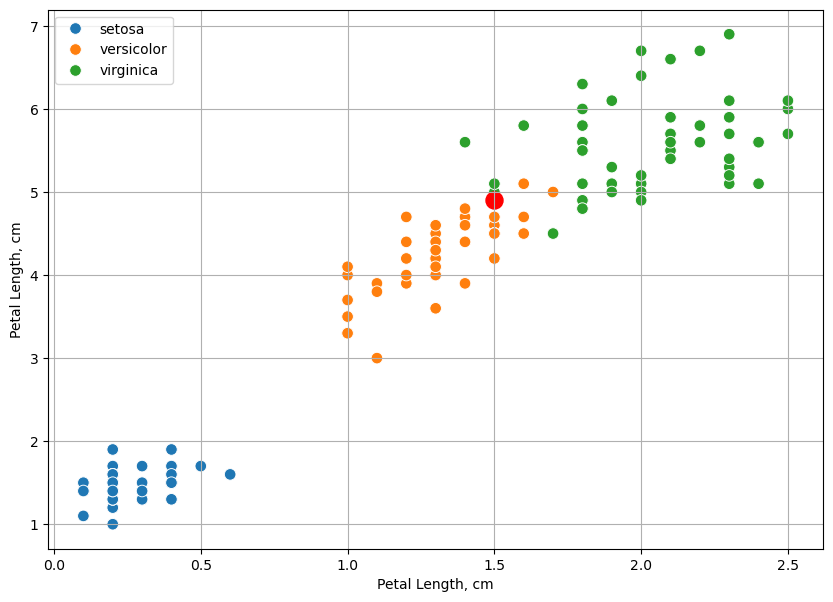

In [110]:
plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.xlabel('Petal Length, cm')
plt.ylabel('Petal Length, cm')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [111]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9666666666666667


### Task 2.3.1

In [112]:
k = [1, 5, 10]
y = []

for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y.append(accuracy_score(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9666666666666667
Accuracy: 0.9666666666666667
Accuracy: 1.0


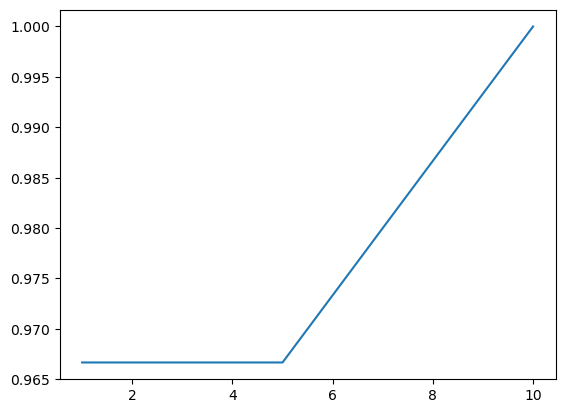

In [113]:
plt.plot(k, y)
plt.show()

From the results we can conclude that the best parameters are 20% test set and 10 nearest neighbors